In [1]:
import numpy
import torchvision
import numpy
import torch
import argparse
import cv2
import detect_utils
from PIL import Image
import matplotlib.pyplot as plt

import time


In [26]:
def detect_objects_in_image(
    file_name,
    model,
    min_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    image = Image.open(file_name)
    model.eval().to(device)
    boxes, classes, labels = detect_utils.predict(image, model, device, 0.9)
    image = detect_utils.draw_boxes(boxes, classes, labels, image)
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    save_name = f"{file_name.split('/')[-1].split('.')[0]}_{min_size}"
    cv2.imwrite(f"outputs/{save_name}.jpg", image)
    return RGB_img

In [31]:
def detect_objects_in_video(
    file_name,
    model,
    min_size):
    cap = cv2.VideoCapture(file_name)
    if (cap.isOpened() == False):
        print('Error while trying to read video. Please check path again')
    # get the frame width and height
    
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    save_name = f"{file_name.split('/')[-1].split('.')[0]}_{file_name}"
    # define codec and create VideoWriter object 
    out = cv2.VideoWriter(f"outputs/{save_name}.mp4", 
                          cv2.VideoWriter_fourcc(*'mp4v'), 30, 
                          (frame_width, frame_height))
    frame_count = 0 # to count total frames
    total_fps = 0 # to get the final frames per second
    # load the model onto the computation device
    model = model.eval().to(device)
    # read until end of video
    while(cap.isOpened()):
        # capture each frame of the video
        ret, frame = cap.read()
        if ret == True:
            # get the start time
            start_time = time.time()
            with torch.no_grad():
                # get predictions for the current frame
                boxes, classes, labels = detect_utils.predict(frame, model, device, 0.8)

            # draw boxes and show current frame on screen
            image = detect_utils.draw_boxes(boxes, classes, labels, frame)
            # get the end time
            end_time = time.time()
            # get the fps
            fps = 1 / (end_time - start_time)
            # add fps to total fps
            total_fps += fps
            # increment frame count
            frame_count += 1
            # press `q` to exit
            wait_time = max(1, int(fps/4))
            cv2.imshow('image', image)
            out.write(image)
            if cv2.waitKey(wait_time) & 0xFF == ord('q'):
                break
        else:
            break
    # release VideoCapture()
    cap.release()
    # close all frames and video windows
    cv2.destroyAllWindows()
    # calculate and print the average FPS
    avg_fps = total_fps / frame_count
    print(f"Average FPS: {avg_fps:.3f}")

In [ ]:
file_name = "input/video2.mp4"
detect_objects_in_video(file_name,model,min_size)

In [3]:
min_size = 900
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, min_size=min_size)
FILE_NAMES = []

/Users/nils/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459044803/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


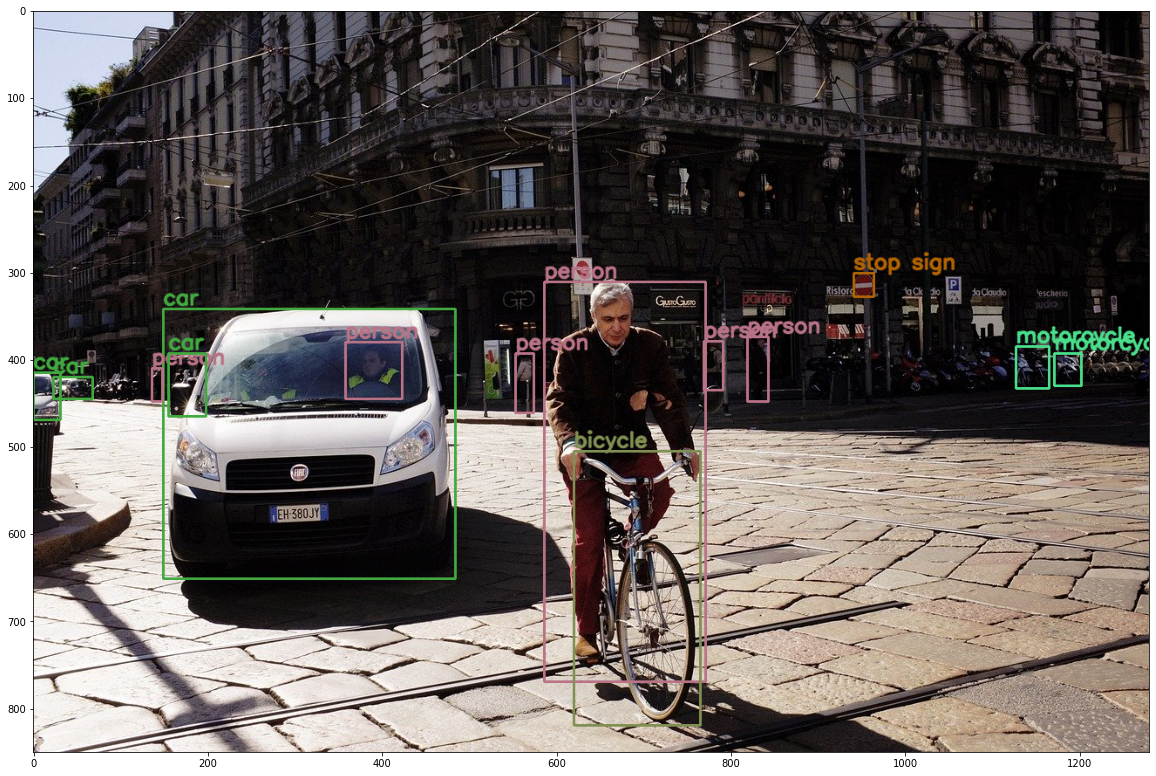

In [4]:
file_name = "input/street.jpg"
detected_image = detect_objects_in_image(file_name, model, min_size)
plt.figure(figsize = (20,20))
plt.imshow(detected_image)

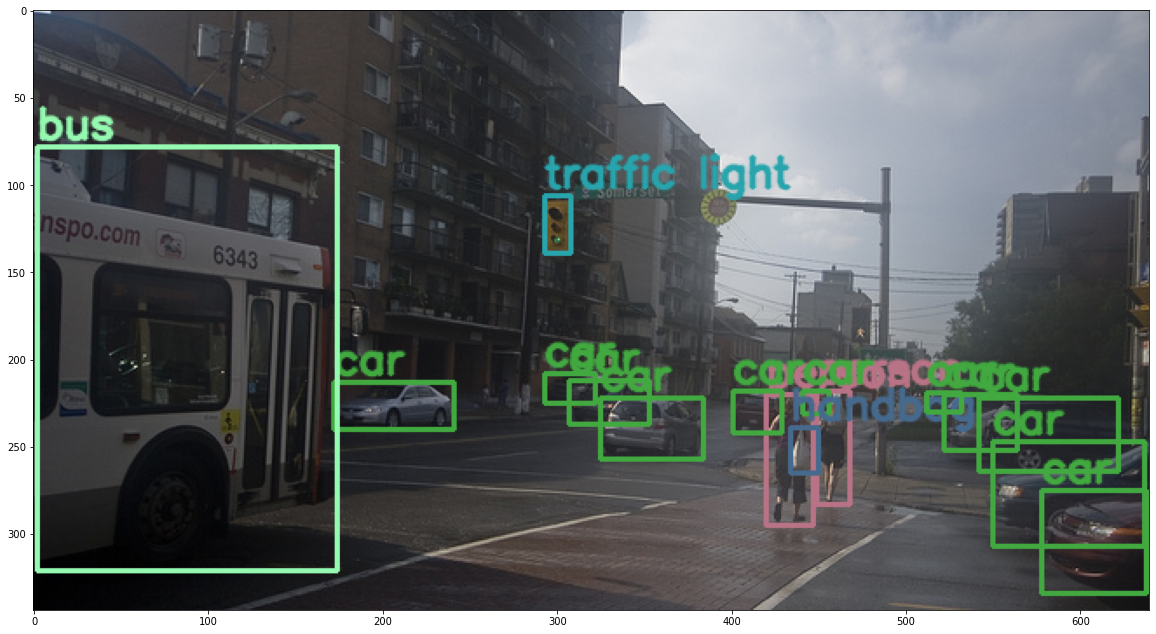

In [27]:
file_name = "input/test3.jpg"
detected_image = detect_objects_in_image(file_name, model, 3200)
plt.figure(figsize = (20,20))
plt.imshow(detected_image)